# Data & Preprocessing

## Mounting Google Drive

In [ ]:
# Mounting Google Drive locally to read datasets - skip if not working on colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path = "/content/drive/MyDrive/ml4health/" # change this to directory where you have the datasets!
print(os.listdir(path))

['msk_impact_2017_clinical_data.tsv', 'combined_encoded.csv', 'test_encoded.csv', 'train_encoded.csv']


## Data Exploration & Preprocessing

In [ ]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
df = pd.read_csv(path+"msk_impact_2017_clinical_data.tsv", sep="\t")
df.head()

,Study ID,Patient ID,Sample ID,Cancer Type,Cancer Type Detailed,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,...,Sample coverage,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,TMB (nonsynonymous),Tumor Purity,Patient's Vital Status
0,msk_impact_2017,P-0000004,P-0000004-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,250.0,0.2782,Matched,NaN,16,...,428,Primary,Female,Unknown,Matched,FFPE,Biopsy,17.746485,50.0,ALIVE
1,msk_impact_2017,P-0000015,P-0000015-T01-IM3,Breast Cancer,Breast Invasive Ductal Carcinoma,198.0,0.3503,Matched,Liver,7,...,281,Metastasis,Female,Never,Matched,FFPE,Biopsy,7.764087,40.0,DECEASED
2,msk_impact_2017,P-0000023,P-0000023-T01-IM3,Mesothelioma,Peritoneal Mesothelioma,250.0,0.1596,Matched,NaN,5,...,454,Primary,Male,Never,Matched,FFPE,Biopsy,5.545777,30.0,DECEASED
3,msk_impact_2017,P-0000024,P-0000024-T01-IM3,Endometrial Cancer,Uterine Endometrioid Carcinoma,250.0,0.3878,Matched,Lung,6,...,1016,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Resection,6.654932,40.0,ALIVE
4,msk_impact_2017,P-0000025,P-0000025-T01-IM3,Endometrial Cancer,Uterine Serous Carcinoma/Uterine Papillary Ser...,250.0,0.0000,Matched,NaN,1,...,1161,Primary,Female,Never,Matched,FFPE,Resection,1.109155,NaN,ALIVE


In [ ]:
df.shape

(10945, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10945 entries, 0 to 10944
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Study ID                       10945 non-null  object 
 1   Patient ID                     10945 non-null  object 
 2   Sample ID                      10945 non-null  object 
 3   Cancer Type                    10945 non-null  object 
 4   Cancer Type Detailed           10945 non-null  object 
 5   DNA Input                      10945 non-null  float64
 6   Fraction Genome Altered        10939 non-null  float64
 7   Matched Status                 10945 non-null  object 
 8   Metastatic Site                4779 non-null   object 
 9   Mutation Count                 10945 non-null  int64  
 10  Oncotree Code                  10945 non-null  object 
 11  Overall Survival (Months)      8142 non-null   float64
 12  Overall Survival Status        10943 non-null 

### Dropping columns with domain knowledge

In [ ]:
# ID columns are dropped since they do not contain any information
df.drop(columns=["Study ID","Patient ID"], inplace = True)

# Repetitive columns are dropped
df.drop(columns=["Cancer Type Detailed"], inplace = True)

# Sample collection attributes dropped since they do not contain any info
df.drop(columns=["Sample ID"],
        inplace = True)

# Oncotree Code is dropped since it is repetition to cancer type
df.drop(columns=["Oncotree Code"], inplace = True)

# Survival repetitive attributes are dropped
df.drop(columns=["Overall Survival (Months)","Patient's Vital Status"], inplace = True)

df.shape

(10945, 20)

In [ ]:
df.head()

,Cancer Type,DNA Input,Fraction Genome Altered,Matched Status,Metastatic Site,Mutation Count,Overall Survival Status,Primary Tumor Site,Sample Class,Sample Collection Source,Number of Samples Per Patient,Sample coverage,Sample Type,Sex,Smoking History,Somatic Status,Specimen Preservation Type,Specimen Type,TMB (nonsynonymous),Tumor Purity
0,Breast Cancer,250.0,0.2782,Matched,NaN,16,0:LIVING,Breast,Tumor,Outside,1,428,Primary,Female,Unknown,Matched,FFPE,Biopsy,17.746485,50.0
1,Breast Cancer,198.0,0.3503,Matched,Liver,7,1:DECEASED,Breast,Tumor,In-House,1,281,Metastasis,Female,Never,Matched,FFPE,Biopsy,7.764087,40.0
2,Mesothelioma,250.0,0.1596,Matched,NaN,5,1:DECEASED,Peritoneum,Tumor,In-House,1,454,Primary,Male,Never,Matched,FFPE,Biopsy,5.545777,30.0
3,Endometrial Cancer,250.0,0.3878,Matched,Lung,6,0:LIVING,Uterus,Tumor,In-House,1,1016,Metastasis,Female,Prev/Curr Smoker,Matched,FFPE,Resection,6.654932,40.0
4,Endometrial Cancer,250.0,0.0000,Matched,NaN,1,0:LIVING,Uterus,Tumor,In-House,2,1161,Primary,Female,Never,Matched,FFPE,Resection,1.109155,NaN


### Dealing with missing values


In [ ]:
# before any operation on data, we split it into training and test to prevent information leakage!!!!
from sklearn.model_selection import train_test_split

X = df.drop("Overall Survival Status", axis=1)
y = df["Overall Survival Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

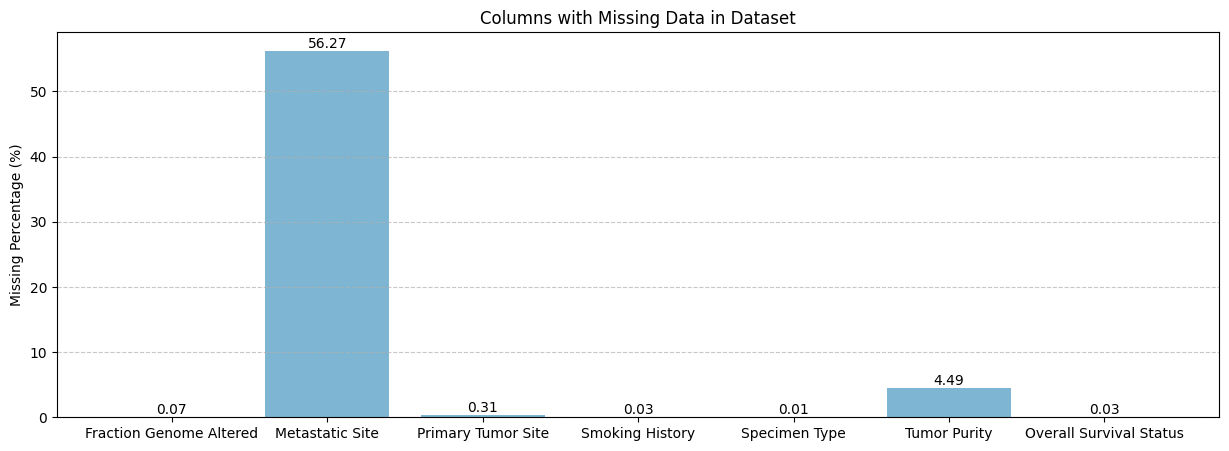

In [ ]:
import matplotlib.pyplot as plt

missing_percentage = (train_data.isnull().sum() / train_data.shape[0]) * 100

# Find columns with non-zero missing data percentages
columns_to_keep = [col for col in train_data.columns if missing_percentage[col] > 0]

# Create subplot
fig, ax = plt.subplots(figsize=(15, 5))

# Plot missing data percentages for
bars = ax.bar(columns_to_keep, [missing_percentage[col] for col in columns_to_keep], color="#7eb5d2", alpha=1)
ax.set_ylabel('Missing Percentage (%)')
ax.set_title('Columns with Missing Data in Dataset')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='x', labelsize=10)

# Display exact percentage on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.show()

In [ ]:
# imputing Metastatic Site
train_data["Metastatic Site"].fillna("None", inplace=True)
test_data["Metastatic Site"].fillna("None", inplace=True)

# imputing Tumor Purity
train_data.loc[:, "Tumor Purity"] = train_data["Tumor Purity"].fillna(train_data["Tumor Purity"].mode()[0])
test_data.loc[:, "Tumor Purity"] = test_data["Tumor Purity"].fillna(test_data["Tumor Purity"].mode()[0])


# dropping other NaN rows
train_data = train_data.dropna(subset=["Fraction Genome Altered","Primary Tumor Site","Specimen Type",
                                       "Smoking History","Overall Survival Status"], how='any')
test_data = test_data.dropna(subset=["Fraction Genome Altered","Primary Tumor Site","Specimen Type",
                                       "Smoking History","Overall Survival Status"], how='any')

In [ ]:
train_data.isnull().sum()/(len(df))*100

Cancer Type                      0.0
DNA Input                        0.0
Fraction Genome Altered          0.0
Matched Status                   0.0
Metastatic Site                  0.0
Mutation Count                   0.0
Primary Tumor Site               0.0
Sample Class                     0.0
Sample Collection Source         0.0
Number of Samples Per Patient    0.0
Sample coverage                  0.0
Sample Type                      0.0
Sex                              0.0
Smoking History                  0.0
Somatic Status                   0.0
Specimen Preservation Type       0.0
Specimen Type                    0.0
TMB (nonsynonymous)              0.0
Tumor Purity                     0.0
Overall Survival Status          0.0
dtype: float64

In [ ]:
test_data.isnull().sum()/(len(df))*100

Cancer Type                      0.0
DNA Input                        0.0
Fraction Genome Altered          0.0
Matched Status                   0.0
Metastatic Site                  0.0
Mutation Count                   0.0
Primary Tumor Site               0.0
Sample Class                     0.0
Sample Collection Source         0.0
Number of Samples Per Patient    0.0
Sample coverage                  0.0
Sample Type                      0.0
Sex                              0.0
Smoking History                  0.0
Somatic Status                   0.0
Specimen Preservation Type       0.0
Specimen Type                    0.0
TMB (nonsynonymous)              0.0
Tumor Purity                     0.0
Overall Survival Status          0.0
dtype: float64

### Data distributions

<Figure size 1200x1000 with 0 Axes>

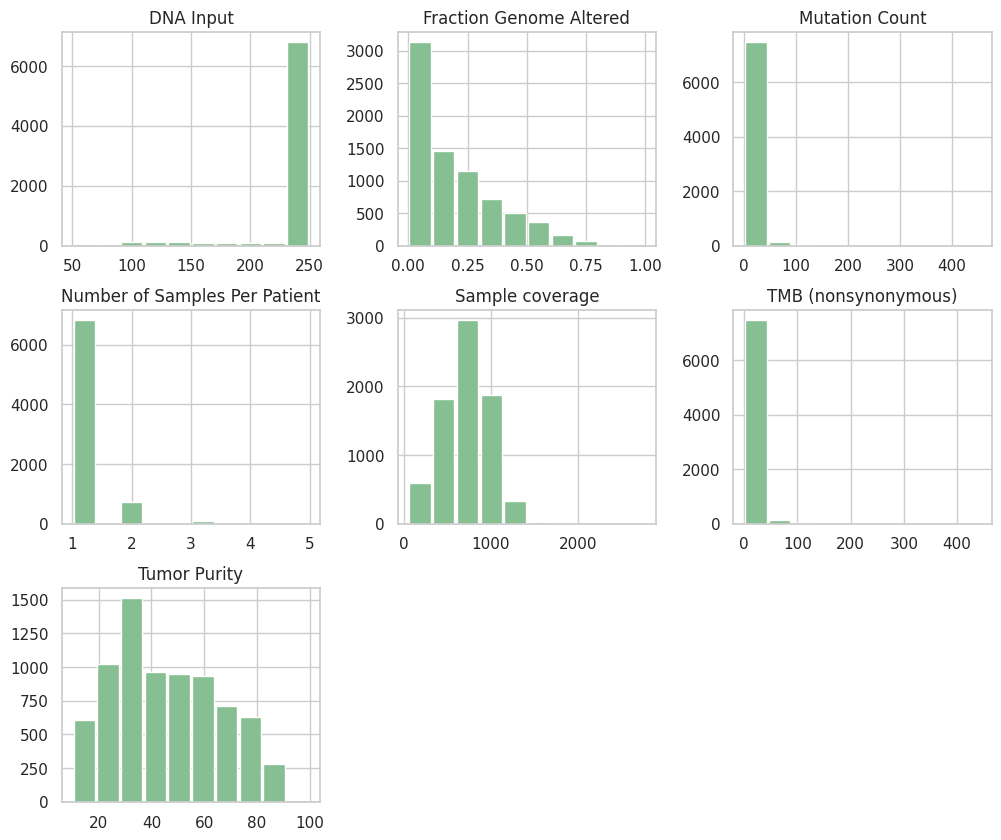

In [ ]:
plt.figure(figsize=(12, 10))
sns.set(style="whitegrid")

train_data.hist(figsize=(12, 10), color='#86bf91', zorder=2, rwidth=0.9)

plt.title('Histograms of Numerical Features', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

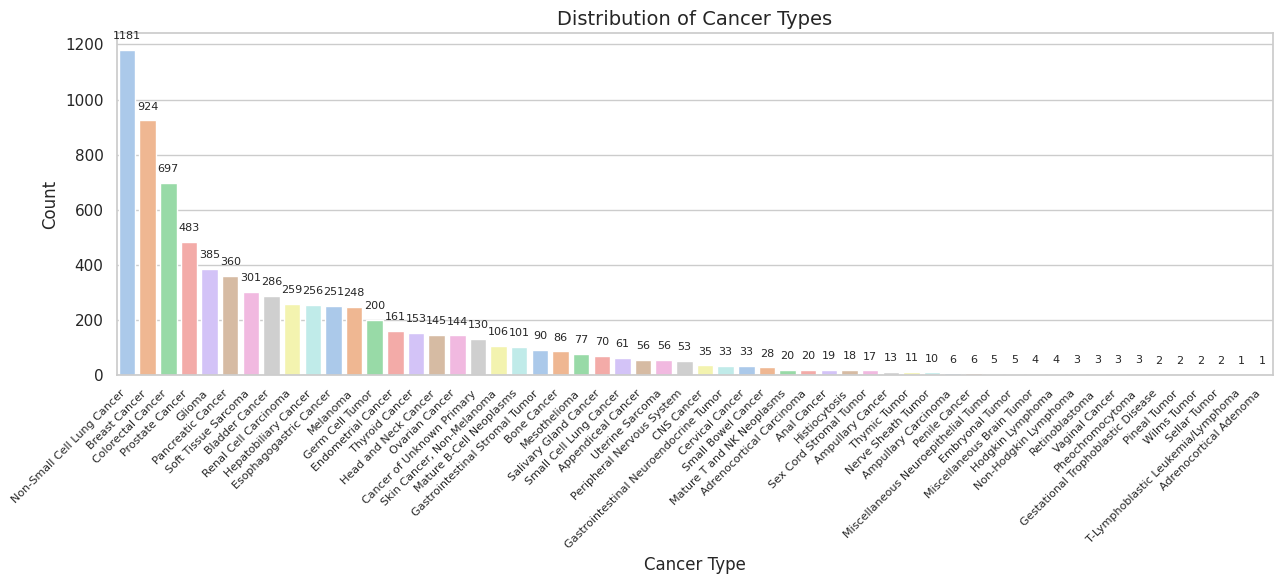

In [ ]:
plt.figure(figsize=(13, 6))

sorted_cancer_types = train_data['Cancer Type'].value_counts().index

ax = sns.countplot(x='Cancer Type', data=train_data, order=sorted_cancer_types, palette="pastel", saturation=0.75)
ax.set_title('Distribution of Cancer Types', fontsize=14)
ax.set_xlabel('Cancer Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()


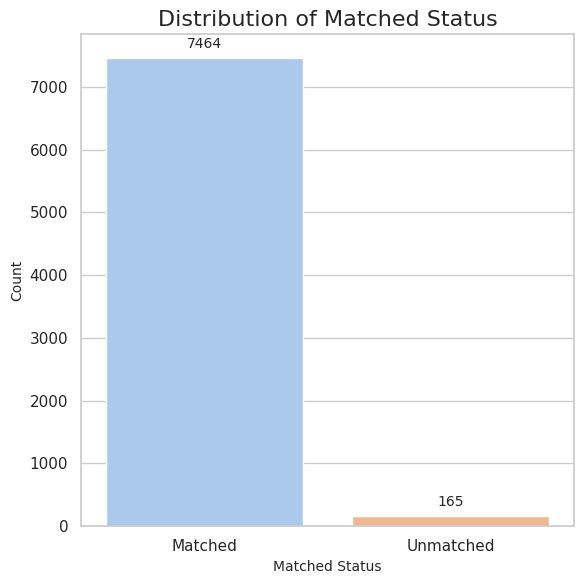

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")

ax = sns.countplot(x='Matched Status', data=train_data, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels())
ax.set_title('Distribution of Matched Status', fontsize=16)
ax.set_xlabel('Matched Status', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

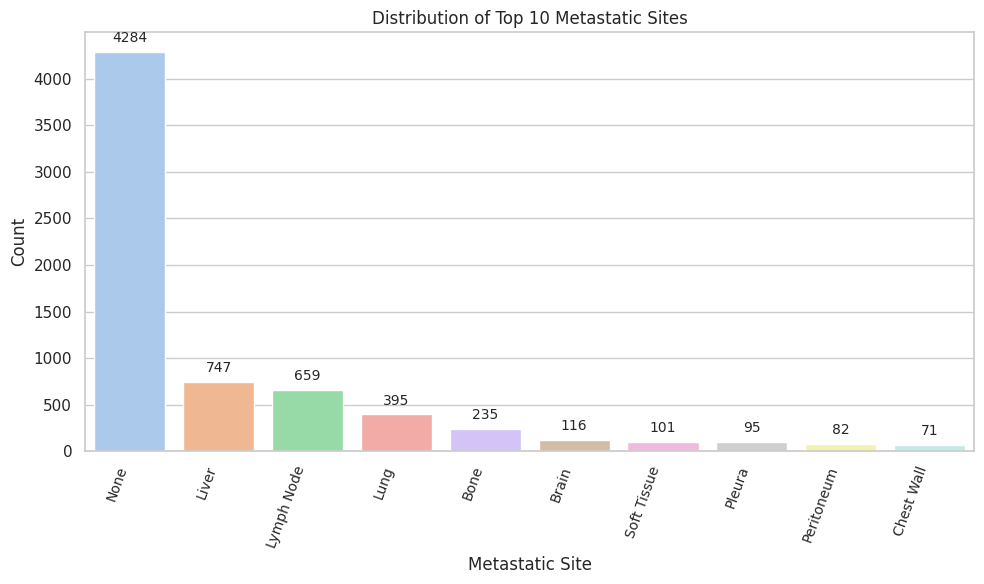

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

top_metastatic_sites = train_data['Metastatic Site'].value_counts().nlargest(10).index
filtered_data = train_data[train_data['Metastatic Site'].isin(top_metastatic_sites)]

ax = sns.countplot(x='Metastatic Site', data=filtered_data, order=top_metastatic_sites, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right', fontsize=10)
ax.set_title('Distribution of Top 10 Metastatic Sites', fontsize=12)
ax.set_xlabel('Metastatic Site', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


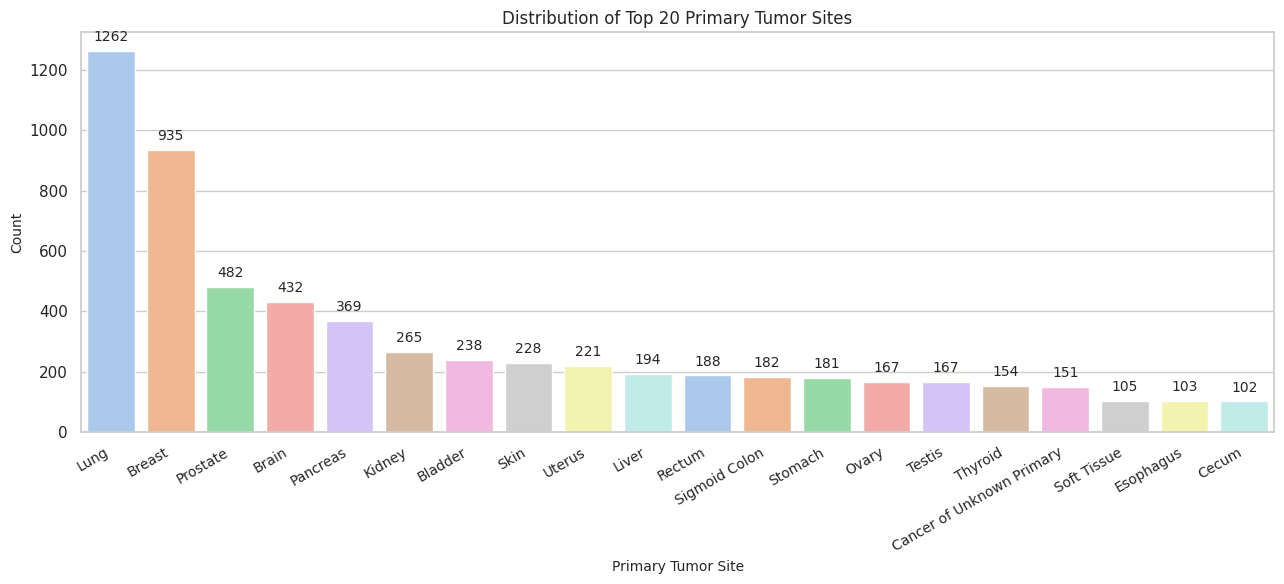

In [ ]:
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")

top_primary_tumor_sites = train_data['Primary Tumor Site'].value_counts().nlargest(20).index
filtered_data = train_data[train_data['Primary Tumor Site'].isin(top_primary_tumor_sites)]

ax = sns.countplot(x='Primary Tumor Site', data=filtered_data, order=top_primary_tumor_sites, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)
ax.set_title('Distribution of Top 20 Primary Tumor Sites', fontsize=12)
ax.set_xlabel('Primary Tumor Site', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


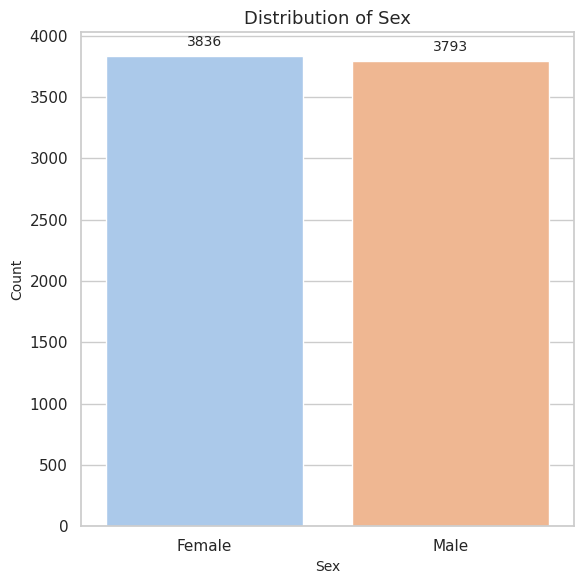

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")

sorted_sex_types = train_data['Sex'].value_counts().index

ax = sns.countplot(x='Sex', data=train_data, order=sorted_sex_types, palette="pastel")
ax.set_title('Distribution of Sex', fontsize=13)
ax.set_xlabel('Sex', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

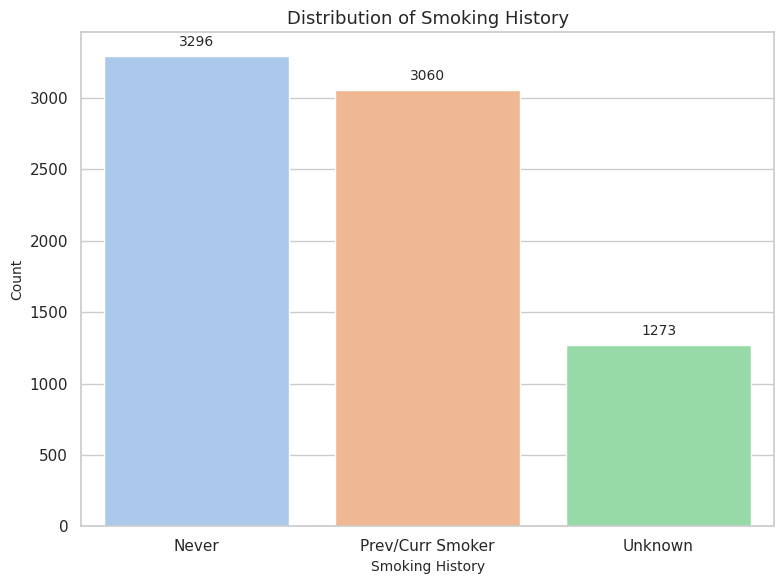

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

sorted_smoking_history = train_data['Smoking History'].value_counts().index

ax = sns.countplot(x='Smoking History', data=train_data, order=sorted_smoking_history, palette="pastel")
ax.set_title('Distribution of Smoking History', fontsize=13)
ax.set_xlabel('Smoking History', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()


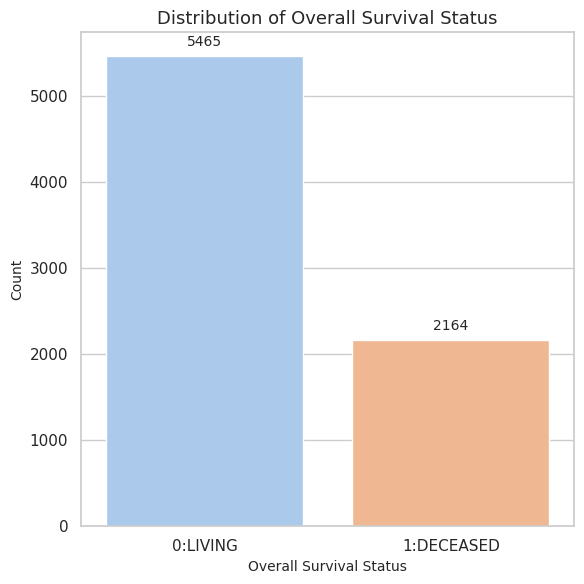

In [ ]:
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")

sorted_vital_status = train_data["Overall Survival Status"].value_counts().index

ax = sns.countplot(x="Overall Survival Status", data=train_data, order=sorted_vital_status, palette="pastel")
ax.set_title("Distribution of Overall Survival Status", fontsize=13)
ax.set_xlabel("Overall Survival Status", fontsize=10)
ax.set_ylabel('Count', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

### Final updates and encoding

In [ ]:
# Dropping Matched Status since it has no information (99% same)
train_data = train_data.drop("Matched Status", axis=1)
test_data = test_data.drop("Matched Status", axis=1)

print(train_data.shape,test_data.shape)

(7629, 19) (3279, 19)


In [ ]:
# Convert metastatic site into binary feature (to reflect there is metastasis or not)
train_data['Metastatic Site'] = train_data['Metastatic Site'].apply(lambda x: 0 if x == 'None' else 1)
test_data['Metastatic Site'] = test_data['Metastatic Site'].apply(lambda x: 0 if x == 'None' else 1)

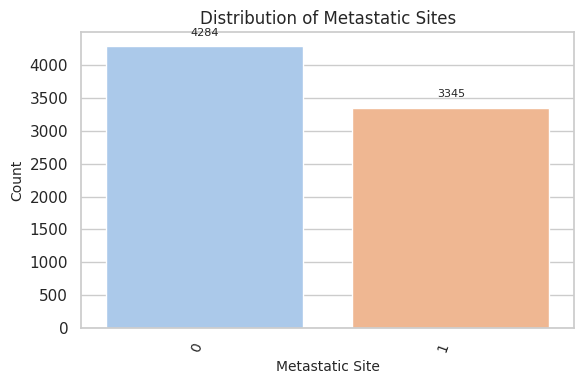

In [ ]:
plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")

sorted_metastatic_sites = train_data['Metastatic Site'].value_counts().index

ax = sns.countplot(x='Metastatic Site', data=train_data, order=sorted_metastatic_sites, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=70, ha='right', fontsize=10)
ax.set_title('Distribution of Metastatic Sites', fontsize=12)
ax.set_xlabel('Metastatic Site', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

In [ ]:
# Combining rare cancer types into "Other"
top_cancer_types = train_data['Cancer Type'].value_counts().nlargest(20).index

train_data['Cancer Type'] = train_data['Cancer Type'].apply(lambda x: x if x in top_cancer_types else 'Other')
test_data['Cancer Type'] = test_data['Cancer Type'].apply(lambda x: x if x in top_cancer_types else 'Other')

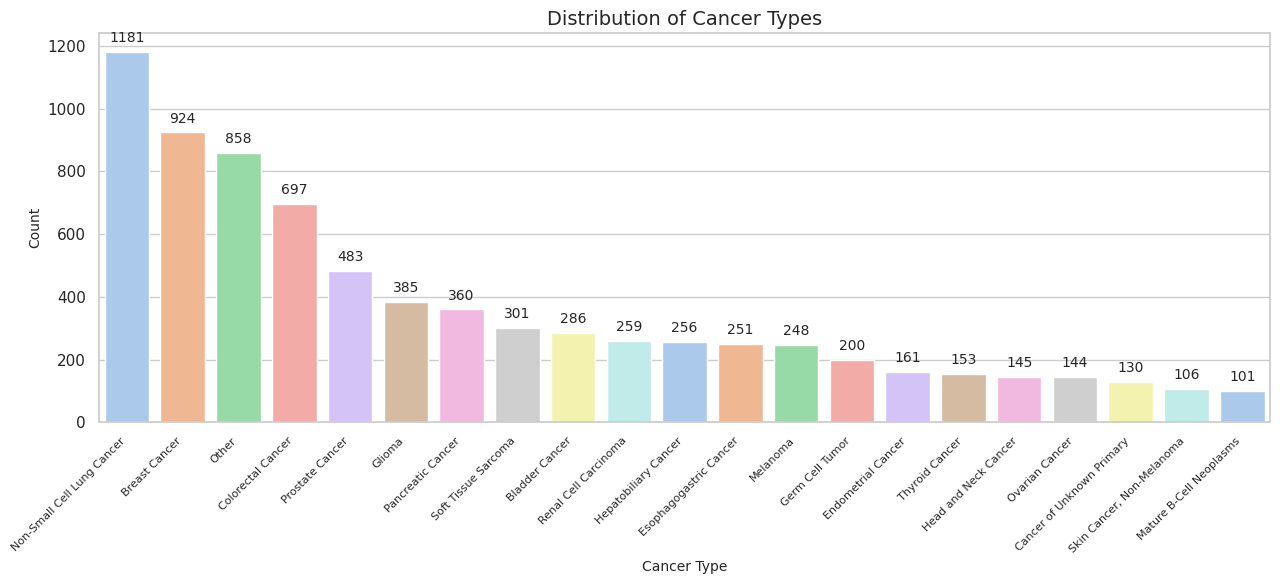

In [ ]:
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")

sorted_cancer_types = train_data['Cancer Type'].value_counts().index

ax = sns.countplot(x='Cancer Type', data=train_data, order=sorted_cancer_types, palette="pastel")
ax.set_title('Distribution of Cancer Types', fontsize=14)
ax.set_xlabel('Cancer Type', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Combine rare Primary Tumor Sites into other
top_primary_tumor_sites = train_data['Primary Tumor Site'].value_counts().nlargest(20).index

train_data['Primary Tumor Site'] = train_data['Primary Tumor Site'].apply(lambda x: x if x in top_primary_tumor_sites else 'Other')
test_data['Primary Tumor Site'] = test_data['Primary Tumor Site'].apply(lambda x: x if x in top_primary_tumor_sites else 'Other')

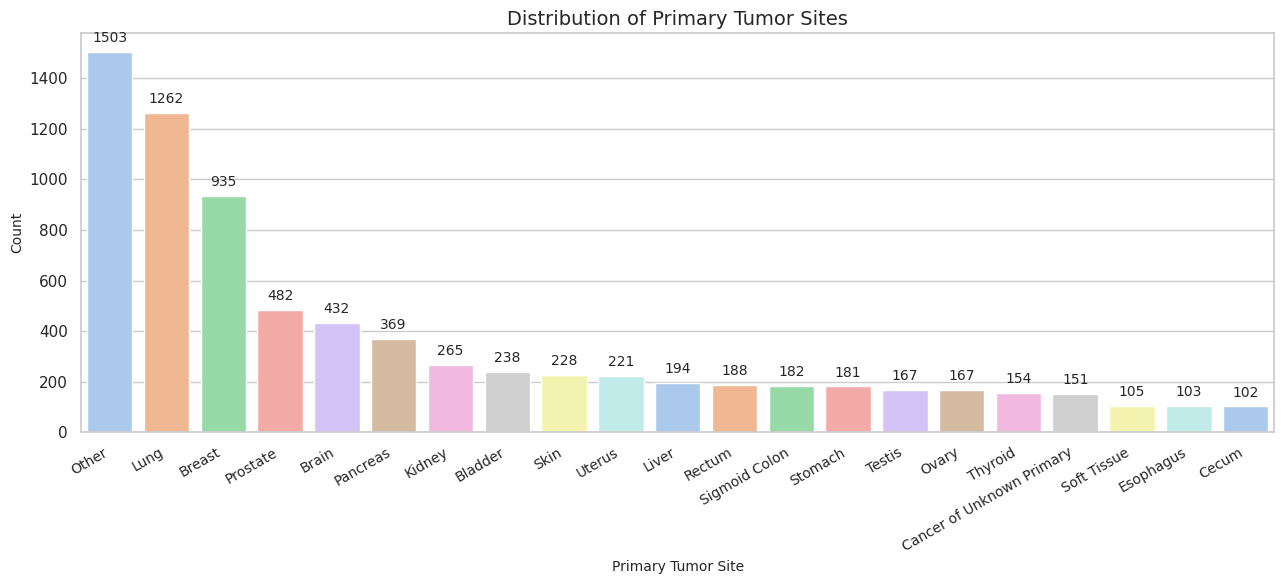

In [ ]:
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")

sorted_primary_tumor_sites = train_data['Primary Tumor Site'].value_counts().index

ax = sns.countplot(x='Primary Tumor Site', data=train_data, order=sorted_primary_tumor_sites, palette="pastel")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)
ax.set_title('Distribution of Primary Tumor Sites', fontsize=14)
ax.set_xlabel('Primary Tumor Site', fontsize=10)
ax.set_ylabel('Count', fontsize=10)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from copy import deepcopy

# merging test and train before encodings to control dimensionality
merged = pd.concat([train_data, test_data], ignore_index=True)
data_cleaned = deepcopy(merged)

one_hot_features = ['Cancer Type', 'Primary Tumor Site', 'Smoking History',
                    'Specimen Preservation Type', 'Specimen Type']

binary_features = ['Sample Class', 'Sample Collection Source',
                   'Sample Type', 'Sex', 'Somatic Status']

# One hot encoding
one_hot_encoded = pd.get_dummies(data_cleaned[one_hot_features])
one_hot_encoded = one_hot_encoded.astype(int)

# Binary encoding
for feature in binary_features:
    data_cleaned[feature] = data_cleaned[feature].astype('category').cat.codes

# Combine into dataset
data_encoded = data_cleaned.drop(one_hot_features, axis=1)
data_encoded = pd.concat([data_encoded, one_hot_encoded], axis=1)

# Train and test separation
y_encoded = data_encoded['Overall Survival Status'].map({'0:LIVING': 0, '1:DECEASED': 1})
X_encoded = data_encoded.drop('Overall Survival Status', axis=1)

X_train_encoded = X_encoded.iloc[:len(train_data)]
X_test_encoded = X_encoded.iloc[len(train_data):]
y_train_encoded = y_encoded.iloc[:len(train_data)]
y_test_encoded = y_encoded.iloc[len(train_data):]

In [ ]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7629 entries, 0 to 7628
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   DNA Input                                     7629 non-null   float64
 1   Fraction Genome Altered                       7629 non-null   float64
 2   Metastatic Site                               7629 non-null   int64  
 3   Mutation Count                                7629 non-null   int64  
 4   Sample Class                                  7629 non-null   int8   
 5   Sample Collection Source                      7629 non-null   int8   
 6   Number of Samples Per Patient                 7629 non-null   int64  
 7   Sample coverage                               7629 non-null   int64  
 8   Sample Type                                   7629 non-null   int8   
 9   Sex                                           7629 non-null   i

In [ ]:
# writing out the encoded train and test datasets

train_combined_df = pd.concat([X_train_encoded, y_train_encoded], axis=1)
test_combined_df = pd.concat([X_test_encoded, y_test_encoded], axis=1)
combined_df = pd.concat([train_combined_df, test_combined_df], axis=0)

train_combined_df.to_csv('train_encoded.csv', index=False)
test_combined_df.to_csv('test_encoded.csv', index=False)
combined_df.to_csv('combined_encoded.csv', index=False)

# Base Models

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#standard scaling our test and training sets
X_train_encoded = scaler.fit_transform(X_train_encoded)
X_test_encoded = scaler.transform(X_test_encoded)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, accuracy_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV

logreg_model = LogisticRegression(penalty=None, random_state=42, max_iter=10000, class_weight='balanced')
logreg_model.fit(X_train_encoded, y_train_encoded)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty=None,
                   random_state=42)

training

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

acc1 = cross_val_score(logreg_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='accuracy')
f1 = cross_val_score(logreg_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='f1_weighted')
auc1 = cross_val_score(logreg_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='roc_auc')

print("Cross-Validated Accuracy Scores:", acc1)
print("Mean Accuracy:", acc1.mean())

print("\nCross-Validated F1 Scores:", f1)
print("Mean F1 Score:", f1.mean())

print("\nCross-Validated ROC AUC Scores:", auc1)
print("Mean ROC AUC Score:", auc1.mean())

logreg_model.fit(X_train_encoded, y_train_encoded)
y_pred = logreg_model.predict(X_train_encoded)

Cross-Validated Accuracy Scores: [0.63695937 0.65923984 0.63302752 0.60943644 0.61992136 0.62778506
 0.6225426  0.5897772  0.63564875 0.64829396]
Mean Accuracy: 0.6282632102179887

Cross-Validated F1 Scores: [0.6545031  0.67488574 0.64935401 0.6274931  0.63771737 0.64553251
 0.63956396 0.60929832 0.65270973 0.66490212]
Mean F1 Score: 0.6455959966502838

Cross-Validated ROC AUC Scores: [0.6953162  0.71058467 0.66627734 0.64391631 0.66876566 0.6795547
 0.66173765 0.63638359 0.67925086 0.71053792]
Mean ROC AUC Score: 0.6752324889545578


testing

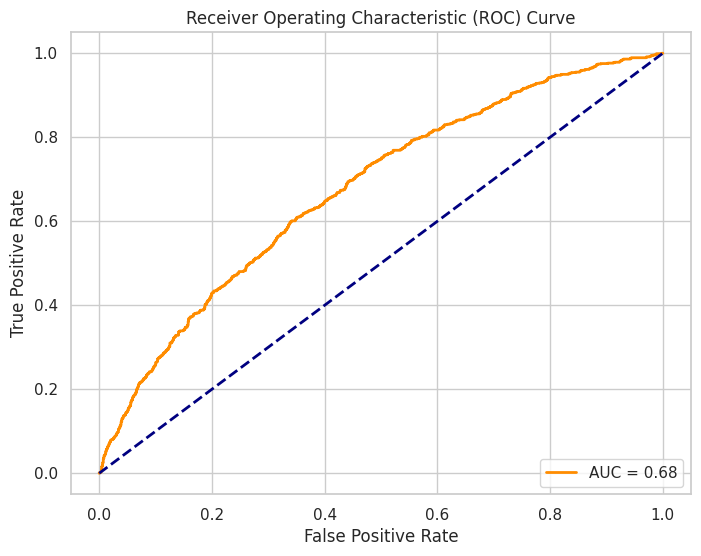


### PERFORMANCE METRICS ###
Accuracy: 0.6282998120129218
F1 Score: 0.6520890230176548
ROC AUC Score: 0.6753837309047106
Confusion Matrix:
 [[1514  830]
 [ 364  571]]


In [ ]:
y_pred = logreg_model.predict(X_test_encoded)

test_accuracy_1 = balanced_accuracy_score(y_test_encoded, y_pred)
test_f1_1 = f1_score(y_test_encoded, y_pred, average='weighted')
test_roc_auc_1 = roc_auc_score(y_test_encoded, logreg_model.predict_proba(X_test_encoded)[:, 1])

fpr, tpr, thresholds = roc_curve(y_test_encoded, logreg_model.predict_proba(X_test_encoded)[:, 1])
roc_auc_curve = auc(fpr, tpr)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\n### PERFORMANCE METRICS ###")
print("Accuracy:", test_accuracy_1)
print("F1 Score:", test_f1_1)
print("ROC AUC Score:", test_roc_auc_1)
print("Confusion Matrix:\n", conf_matrix)

### LR model w/L-1 regularization

In [ ]:
logreg_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, max_iter=10000, class_weight='balanced')
logreg_model.fit(X_train_encoded, y_train_encoded)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=42, solver='liblinear')

training

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(logreg_model, param_grid, cv=stratified_kfold, scoring='f1_weighted')
grid_search.fit(X_train_encoded, y_train_encoded)
print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

acc2 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='balanced_accuracy')
print("\nCross-Validated Accuracy Scores for Best Model:", acc2)
print("Mean Accuracy Score for Best Model:", acc2.mean())

f2 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='f1_weighted')
print("\nCross-Validated F1 Scores for Best Model:", f2)
print("Mean F1 Score for Best Model:", f2.mean())


auc2 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='roc_auc')
print("\nCross-Validated ROC AUC Scores for Best Model:", auc2)
print("Mean ROC AUC Score for Best Model:", auc2.mean())

Best Hyperparameters: {'C': 100}

Cross-Validated Accuracy Scores for Best Model: [0.64454685 0.65868542 0.62079355 0.59873722 0.61445426 0.63210445
 0.61269644 0.58563748 0.63712631 0.65244709]
Mean Accuracy Score for Best Model: 0.6257229096609589

Cross-Validated F1 Scores for Best Model: [0.6545031  0.67488574 0.64935401 0.6274931  0.63771737 0.64431815
 0.63956396 0.60929832 0.65270973 0.66490212]
Mean F1 Score for Best Model: 0.6454745599137744

Cross-Validated ROC AUC Scores for Best Model: [0.69532467 0.71054235 0.66633658 0.64395863 0.66867256 0.68077007
 0.66171233 0.63641735 0.67926774 0.71055488]
Mean ROC AUC Score for Best Model: 0.6753557151663215


testing

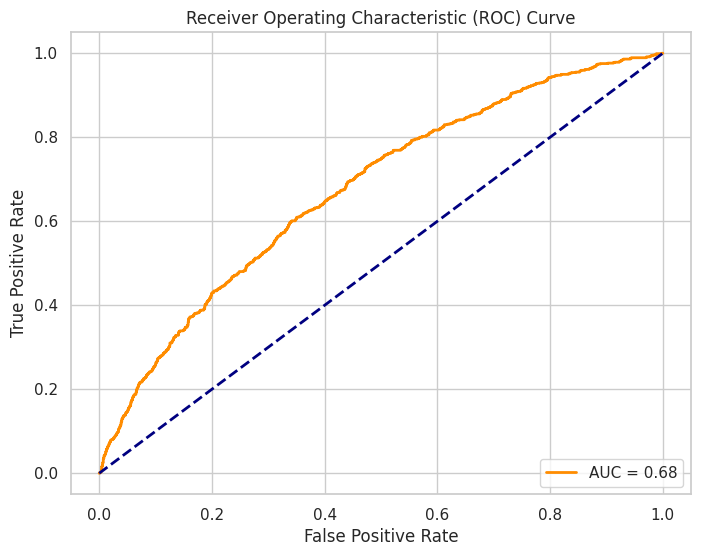


### PERFORMANCE METRICS ###
Accuracy: 0.6282998120129218
F1 Score: 0.6520890230176548
ROC AUC Score: 0.675381449508131
Confusion Matrix:
 [[1514  830]
 [ 364  571]]


In [ ]:
y_pred = best_model.predict(X_test_encoded)

test_accuracy_2 = balanced_accuracy_score(y_test_encoded, y_pred)
test_f1_2 = f1_score(y_test_encoded, y_pred, average='weighted')
test_roc_auc_2 = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test_encoded)[:, 1])

fpr, tpr, thresholds = roc_curve(y_test_encoded, best_model.predict_proba(X_test_encoded)[:, 1])
roc_auc_curve = auc(fpr, tpr)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\n### PERFORMANCE METRICS ###")
print("Accuracy:", test_accuracy_2)
print("F1 Score:", test_f1_2)
print("ROC AUC Score:", test_roc_auc_2)
print("Confusion Matrix:\n", conf_matrix)

### LR model w/L-2 regularization

In [ ]:
logreg_model = LogisticRegression(penalty='l2', solver='liblinear', random_state=42, max_iter=10000, class_weight='balanced')
logreg_model.fit(X_train_encoded, y_train_encoded)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42,
                   solver='liblinear')

training

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(logreg_model, param_grid, cv=stratified_kfold, scoring='f1_weighted')
grid_search.fit(X_train_encoded, y_train_encoded)
print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

acc3 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='balanced_accuracy')
print("\nCross-Validated Balanced Accuracy Scores for Best Model:", acc3)
print("Mean Balanced Accuracy Score for Best Model:", acc3.mean())

f3 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='f1_weighted')
print("\nCross-Validated F1 Scores for Best Model:", f3)
print("Mean F1 Score for Best Model:", f3.mean())

auc3 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='roc_auc')
print("\nCross-Validated ROC AUC Scores for Best Model:", auc3)
print("Mean ROC AUC Score for Best Model:", auc3.mean())

Best Hyperparameters: {'C': 100}

Cross-Validated Balanced Accuracy Scores for Best Model: [0.64454685 0.65868542 0.62170763 0.5996513  0.61354019 0.63210445
 0.61269644 0.58563748 0.63712631 0.65244709]
Mean Balanced Accuracy Score for Best Model: 0.6258143173392039

Cross-Validated F1 Scores for Best Model: [0.6545031  0.67488574 0.65053476 0.62868205 0.63652073 0.64431815
 0.63956396 0.60929832 0.65270973 0.66490212]
Mean F1 Score for Best Model: 0.6455918648761828

Cross-Validated ROC AUC Scores for Best Model: [0.6952231  0.71052542 0.66642122 0.64399248 0.66851175 0.67995983
 0.66150133 0.63636671 0.67916646 0.71018179]
Mean ROC AUC Score for Best Model: 0.6751850084168245


testing

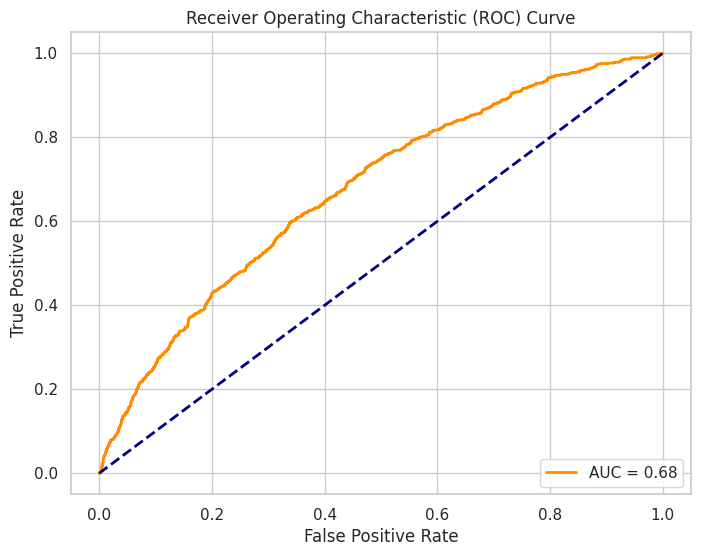


### PERFORMANCE METRICS ###
Accuracy: 0.628086501432717
F1 Score: 0.6518121230602348
ROC AUC Score: 0.6753476848387509
Confusion Matrix:
 [[1513  831]
 [ 364  571]]


In [ ]:
y_pred = best_model.predict(X_test_encoded)

test_accuracy_3 = balanced_accuracy_score(y_test_encoded, y_pred)
test_f1_3 = f1_score(y_test_encoded, y_pred, average='weighted')
test_roc_auc_3 = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test_encoded)[:, 1])

fpr, tpr, thresholds = roc_curve(y_test_encoded, best_model.predict_proba(X_test_encoded)[:, 1])
roc_auc_curve = auc(fpr, tpr)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\n### PERFORMANCE METRICS ###")
print("Accuracy:", test_accuracy_3)
print("F1 Score:", test_f1_3)
print("ROC AUC Score:", test_roc_auc_3)
print("Confusion Matrix:\n", conf_matrix)

plotting for logistic regression based models performances

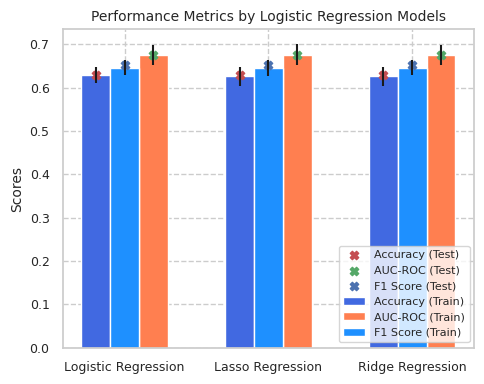

In [ ]:
# plotting here
import numpy as np
import matplotlib.pyplot as plt

acc_values = [acc1,acc2,acc3]
f1_values = [f1,f2,f3]
auc_roc_values = [auc1, auc2, auc3]

test_acc = [test_accuracy_1, test_accuracy_2, test_accuracy_3]
test_f1 = [test_f1_1, test_f1_2, test_f1_3]
test_auc_roc = [test_roc_auc_1, test_roc_auc_2, test_roc_auc_3]

acc_means = [np.mean(vals) for vals in acc_values]
acc_std = [np.std(vals) for vals in acc_values]
f1_means = [np.mean(vals) for vals in f1_values]
f1_std = [np.std(vals) for vals in f1_values]
auc_roc_means = [np.mean(vals) for vals in auc_roc_values]
auc_roc_std = [np.std(vals) for vals in auc_roc_values]

model_names = ["Logistic Regression", "Lasso Regression", "Ridge Regression"]
x = np.arange(len(model_names))
width = 0.2
fig, ax = plt.subplots(figsize=(5, 4))

rects1 = ax.bar(x - width, acc_means, width, label='Accuracy (Train)', yerr=acc_std, color='royalblue')
rects2 = ax.bar(x + width, auc_roc_means, width, label='AUC-ROC (Train)', yerr=auc_roc_std, color='coral')
rects3 = ax.bar(x, f1_means, width, label='F1 Score (Train)', yerr=f1_std, color='dodgerblue')

ax.scatter(x - width, test_acc, color='r', marker='X', label='Accuracy (Test)')
ax.scatter(x + width, test_auc_roc, color='g', marker='X', label='AUC-ROC (Test)')
ax.scatter(x, test_f1, color='b', marker='X', label='F1 Score (Test)')

ax.set_ylabel('Scores', fontsize=10)
ax.set_title('Performance Metrics by Logistic Regression Models', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=9)
ax.legend(loc='lower center', bbox_to_anchor=(.83, 0), fontsize=8)
ax.tick_params(axis='y', labelsize=9)
ax.grid(True, linestyle='--')
fig.tight_layout()

plt.show()

## Decision Trees

training

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, balanced_accuracy_score

decision_tree = DecisionTreeClassifier(random_state=42, class_weight="balanced")

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(decision_tree, param_grid, cv=stratified_kfold, scoring='f1_weighted')
grid_search.fit(X_train_encoded, y_train_encoded)
print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

acc1 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='balanced_accuracy')
print("\nCross-Validated Balanced Accuracy Scores for Best Model:", acc1)
print("Mean Balanced Accuracy Score for Best Model:", acc1.mean())

f1 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='f1_weighted')
print("\nCross-Validated F1 Scores for Best Model:", f1)
print("Mean F1 Score for Best Model:", f1.mean())

auc1 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='roc_auc')
print("\nCross-Validated ROC AUC Scores for Best Model:", auc1)
print("Mean ROC AUC Score for Best Model:", auc1.mean())


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}

Cross-Validated Balanced Accuracy Scores for Best Model: [0.56373146 0.54046482 0.54229298 0.53040998 0.53241587 0.54744181
 0.54779629 0.56168026 0.54094293 0.53431522]
Mean Balanced Accuracy Score for Best Model: 0.5441491619828738

Cross-Validated F1 Scores for Best Model: [0.64222495 0.63081265 0.63288505 0.61938425 0.61504388 0.62644657
 0.63459923 0.63959928 0.62567966 0.6225586 ]
Mean F1 Score for Best Model: 0.6289234122426228

Cross-Validated ROC AUC Scores for Best Model: [0.56373146 0.54046482 0.54229298 0.53040998 0.53241587 0.54744181
 0.54779629 0.56168026 0.54094293 0.53431522]
Mean ROC AUC Score for Best Model: 0.5441491619828737


testing

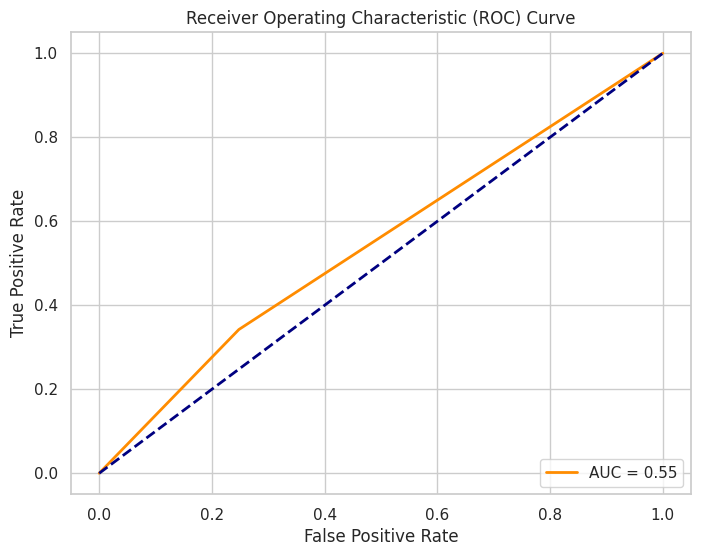


### PERFORMANCE METRICS ###
Accuracy: 0.5471895475534303
F1 Score: 0.6331905241085489
ROC AUC Score: 0.5471895475534303
Confusion Matrix:
 [[1763  581]
 [ 615  320]]


In [ ]:
y_pred = best_model.predict(X_test_encoded)

test_accuracy_1 = balanced_accuracy_score(y_test_encoded, y_pred)
test_f1_1 = f1_score(y_test_encoded, y_pred, average='weighted')
test_roc_auc_1 = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test_encoded)[:, 1])

fpr, tpr, thresholds = roc_curve(y_test_encoded, best_model.predict_proba(X_test_encoded)[:, 1])
roc_auc_curve = auc(fpr, tpr)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\n### PERFORMANCE METRICS ###")
print("Accuracy:", test_accuracy_1)
print("F1 Score:", test_f1_1)
print("ROC AUC Score:", test_roc_auc_1)
print("Confusion Matrix:\n", conf_matrix)

## Random Forests

training

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced')

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(random_forest_model, param_grid, cv=stratified_kfold, scoring='f1_weighted')
grid_search.fit(X_train_encoded, y_train_encoded)
print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

acc2 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='balanced_accuracy')
print("\nCross-Validated Balanced Accuracy Scores for Best Model:", acc2)
print("Mean Balanced Accuracy Score for Best Model:", acc2.mean())

f2 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='f1_weighted')
print("\nCross-Validated F1 Scores for Best Model:", f2)
print("Mean F1 Score for Best Model:", f2.mean())

auc2 = cross_val_score(best_model, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='roc_auc')
print("\nCross-Validated ROC AUC Scores for Best Model:", auc2)
print("Mean ROC AUC Score for Best Model:", auc2.mean())

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Cross-Validated Balanced Accuracy Scores for Best Model: [0.64513085 0.65640869 0.60303677 0.57751456 0.61960864 0.61993383
 0.56008508 0.60155973 0.62498523 0.6268315 ]
Mean Balanced Accuracy Score for Best Model: 0.6135094873794231

Cross-Validated F1 Scores for Best Model: [0.71835797 0.73792271 0.68809518 0.67174043 0.70315128 0.69996836
 0.65337883 0.68282532 0.70481371 0.70925644]
Mean F1 Score for Best Model: 0.6969510234887805

Cross-Validated ROC AUC Scores for Best Model: [0.70659828 0.72052949 0.65953179 0.63937978 0.69553626 0.69895005
 0.64419068 0.66792424 0.70452052 0.69003527]
Mean ROC AUC Score for Best Model: 0.6827196360683023


testing

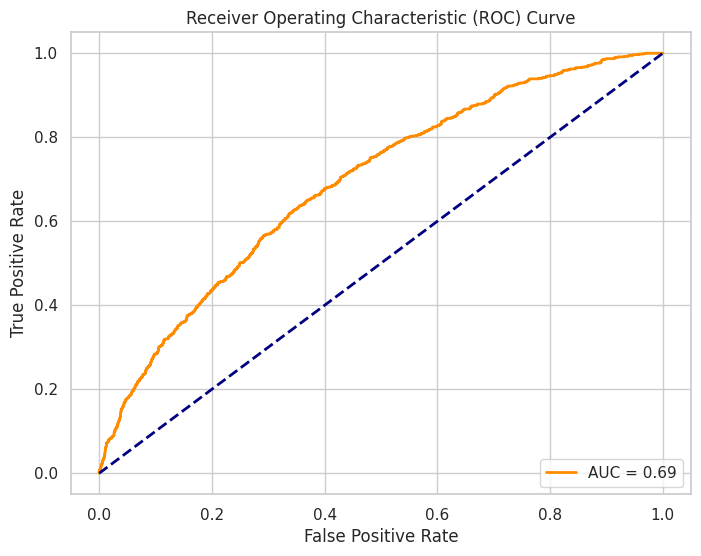


### PERFORMANCE METRICS ###
Accuracy: 0.6111487288058257
F1 Score: 0.6950896093442551
ROC AUC Score: 0.6918326002445657
Confusion Matrix:
 [[1940  404]
 [ 566  369]]


In [ ]:
y_pred = best_model.predict(X_test_encoded)

test_accuracy_2 = balanced_accuracy_score(y_test_encoded, y_pred)
test_f1_2 = f1_score(y_test_encoded, y_pred, average='weighted')
test_roc_auc_2 = roc_auc_score(y_test_encoded, best_model.predict_proba(X_test_encoded)[:, 1])

fpr, tpr, thresholds = roc_curve(y_test_encoded, best_model.predict_proba(X_test_encoded)[:, 1])
roc_auc_curve = auc(fpr, tpr)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\n### PERFORMANCE METRICS ###")
print("Accuracy:", test_accuracy_2)
print("F1 Score:", test_f1_2)
print("ROC AUC Score:", test_roc_auc_2)
print("Confusion Matrix:\n", conf_matrix)

## XGBoost

training

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, confusion_matrix

dtrain = xgb.DMatrix(X_train_encoded, label=y_train_encoded)
dtest = xgb.DMatrix(X_test_encoded, label=y_test_encoded)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'scale_pos_weight': sum(y_train_encoded == 0) / sum(y_train_encoded == 1),
    'random_state': 42,
    'n_jobs': -1
}

param_grid_xgb_detailed = {
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 75, 100]
}

xgb_model_detailed = xgb.XGBClassifier(**params)

stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

random_search_xgb_detailed = RandomizedSearchCV(
    xgb_model_detailed,
    param_distributions=param_grid_xgb_detailed,
    n_iter=5000,
    scoring='f1_weighted',
    cv=stratified_kfold,
    n_jobs=-1,
    random_state=42
)

random_search_xgb_detailed.fit(X_train_encoded, y_train_encoded)

best_params_xgb_detailed = random_search_xgb_detailed.best_params_
best_xgb_model_detailed = random_search_xgb_detailed.best_estimator_

acc3 = cross_val_score(best_xgb_model_detailed, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='balanced_accuracy')
print("\nCross-Validated Balanced Accuracy Scores for Best Model:", acc3)
print("Mean Balanced Accuracy Score for Best Model:", acc3.mean())

f3 = cross_val_score(best_xgb_model_detailed, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='f1_weighted')
print("Best Hyperparameters:", best_params_xgb_detailed)
print("\nCross-Validated F1 Scores for Best Model:", f3)
print("Mean F1 Score for Best Model:", f3.mean())

auc3 = cross_val_score(best_xgb_model_detailed, X_train_encoded, y_train_encoded, cv=stratified_kfold, scoring='roc_auc')
print("\nCross-Validated ROC AUC Scores for Best Model:", auc3)
print("Mean ROC AUC Score for Best Model:", auc3.mean())



Cross-Validated Balanced Accuracy Scores for Best Model: [0.66130916 0.6714825  0.61866917 0.60166988 0.65216839 0.65452558
 0.62912088 0.65127614 0.66362401 0.66096866]
Mean Balanced Accuracy Score for Best Model: 0.6464814381880342
Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}

Cross-Validated F1 Scores for Best Model: [0.68504444 0.69153471 0.66261932 0.64585277 0.67321344 0.67542866
 0.66704525 0.67618913 0.69362412 0.68781639]
Mean F1 Score for Best Model: 0.6758368234213363

Cross-Validated ROC AUC Scores for Best Model: [0.72431275 0.74661453 0.67804184 0.64313765 0.70445697 0.71534917
 0.67615334 0.68293074 0.71074931 0.69681861]
Mean ROC AUC Score for Best Model: 0.697856492125329


testing

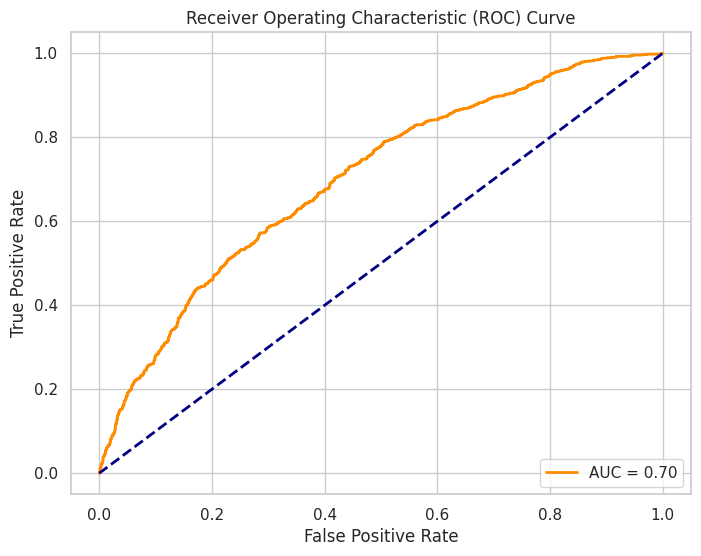


### PERFORMANCE METRICS ON TEST SET ###
Accuracy: 0.6387372013651877
F1 Score: 0.6693248459675835
ROC AUC Score: 0.6996044058330747
Confusion Matrix:
 [[1588  756]
 [ 374  561]]


In [ ]:
y_pred = best_xgb_model_detailed.predict(X_test_encoded)

test_accuracy_3 = balanced_accuracy_score(y_test_encoded, y_pred)
test_f1_3 = f1_score(y_test_encoded, y_pred, average='weighted')
test_roc_auc_3 = roc_auc_score(y_test_encoded, best_xgb_model_detailed.predict_proba(X_test_encoded)[:, 1])

fpr, tpr, thresholds = roc_curve(y_test_encoded, best_xgb_model_detailed.predict_proba(X_test_encoded)[:, 1])
roc_auc_curve = auc(fpr, tpr)

conf_matrix = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc_curve:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\n### PERFORMANCE METRICS ON TEST SET ###")
print("Accuracy:", test_accuracy_3)
print("F1 Score:", test_f1_3)
print("ROC AUC Score:", test_roc_auc_3)
print("Confusion Matrix:\n", conf_matrix)


plotting decision tree based model performances

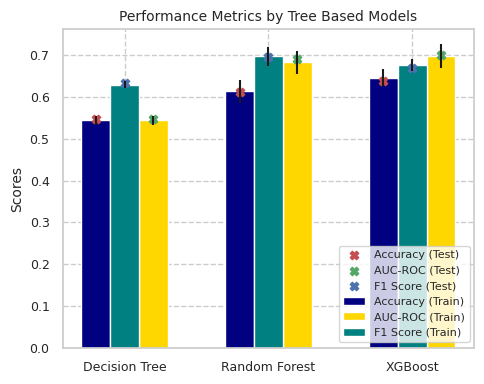

In [ ]:
# plotting here
import numpy as np
import matplotlib.pyplot as plt

acc_values = [acc1,acc2,acc3]
f1_values = [f1,f2,f3]
auc_roc_values = [auc1, auc2, auc3]

test_acc = [test_accuracy_1, test_accuracy_2, test_accuracy_3]
test_f1 = [test_f1_1, test_f1_2, test_f1_3]
test_auc_roc = [test_roc_auc_1, test_roc_auc_2, test_roc_auc_3]

acc_means = [np.mean(vals) for vals in acc_values]
acc_std = [np.std(vals) for vals in acc_values]
f1_means = [np.mean(vals) for vals in f1_values]
f1_std = [np.std(vals) for vals in f1_values]
auc_roc_means = [np.mean(vals) for vals in auc_roc_values]
auc_roc_std = [np.std(vals) for vals in auc_roc_values]

model_names = ["Decision Tree", "Random Forest", "XGBoost"]
x = np.arange(len(model_names))
width = 0.2
fig, ax = plt.subplots(figsize=(5, 4))

rects1 = ax.bar(x - width, acc_means, width, label='Accuracy (Train)', yerr=acc_std, color='navy')
rects2 = ax.bar(x + width, auc_roc_means, width, label='AUC-ROC (Train)', yerr=auc_roc_std, color='gold')
rects3 = ax.bar(x, f1_means, width, label='F1 Score (Train)', yerr=f1_std, color='teal')

ax.scatter(x - width, test_acc, color='r', marker='X', label='Accuracy (Test)')
ax.scatter(x + width, test_auc_roc, color='g', marker='X', label='AUC-ROC (Test)')
ax.scatter(x, test_f1, color='b', marker='X', label='F1 Score (Test)')

ax.set_ylabel('Scores', fontsize=10)
ax.set_title('Performance Metrics by Tree Based Models', fontsize=10)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=9)
ax.legend(loc='lower center', bbox_to_anchor=(.83, 0), fontsize=8)
ax.tick_params(axis='y', labelsize=9)
ax.grid(True, linestyle='--')
fig.tight_layout()

plt.show()